# Customer Happiness Index Prediction

**Made by: Group 6 in partial completion of Pattern Recognition Class**
 - Timothy Chan
 - Rhyle Nodnylson Guinto
 - Chino Laguda
 - Randall Joseph Pajaro

## Importing required libraries and dataset

In [1]:
import numpy as np
import pandas as pd
from IPython.display import Markdown as md

In [2]:
df = pd.read_csv('telco_dataset.csv')
df.head()

,Customer_ID,subscription_type,start_date,years_active,no_of_other_postpaid_accounts,frequent_availed_top_up_amount_30days,postpaid_plan_30days,monthly_revenue,no_of_top_ups_30days,last_date_top_up,...,no_of_days_subscribed_to_OtherApps_30days,total_hours_internet_usage_30days,total_hours_OtherApps_usage_30days,no_of_failed_Call_Text_30days,no_of_failed_Surfing_30days,no_of_failed_143hotline_30days,no_of_call_records_Complaint_30days,mins_of_call_records_Complaint_30days,no_of_logged_GlobeOne_30days,Survey_Score
0,0917-2849660931,postpaid,04/06/2010,9.30,0,116,999,1115,1,5/19/2019,...,23,234,234,20,18,7,4,3,14,7
1,0917-3521446959,prepaid,05/07/2014,5.16,0,100,0,300,2,4/14/2019,...,3,136,20,28,20,11,5,23,9,3
2,0917-6526588656,postpaid,09/06/2017,1.78,0,200,599,799,1,5/18/2019,...,26,139,247,5,4,6,9,13,9,0
3,0917-8987002220,prepaid,10/08/2013,5.75,0,300,0,499,2,5/30/2019,...,26,78,119,17,27,25,4,27,16,0
4,0917-5353179110,prepaid,7/28/2011,7.98,0,100,0,400,5,4/23/2019,...,0,258,113,30,11,9,2,3,1,0


## User Profile

In [3]:
# For cleanliness and understanding purposes, the results of the ratings shall be placed in a new dataframe called "data"
data = pd.DataFrame()

# sub_type_rating
data['subscription_type_rating'] = np.where(df['subscription_type']=='postpaid', 10, 5)


# years_active_rating
conditions = [
    (df['years_active'] < 1),
    (df['years_active'] >= 1) & (df['years_active'] <= 2),
    (df['years_active'] > 2) & (df['years_active'] <= 4),
    (df['years_active'] > 4) & (df['years_active'] <= 6),
    (df['years_active'] > 6) & (df['years_active'] <= 8),
    (df['years_active'] > 8)    
]
values = [5, 6, 7, 8, 9, 10]
data['years_active_rating'] = np.select(conditions, values)


# other_postpaid_accts rating
conditions = [
    (df['no_of_other_postpaid_accounts'] >= 0) & (df['no_of_other_postpaid_accounts'] <= 1),
    (df['no_of_other_postpaid_accounts'] >= 2) & (df['no_of_other_postpaid_accounts'] <= 3),
    (df['no_of_other_postpaid_accounts'] >= 4) & (df['no_of_other_postpaid_accounts'] <= 5)
]
values = [8, 9, 10]
data['no_of_other_postpaid_accounts_rating'] = np.select(conditions, values)

In [4]:
data.head()

,subscription_type_rating,years_active_rating,no_of_other_postpaid_accounts_rating
0,10,10,8
1,5,8,8
2,10,6,8
3,5,8,8
4,5,9,8


## Load Profile

In [5]:
# frequent_availed_top_up_amount_30days rating
conditions = [
    (df['frequent_availed_top_up_amount_30days'] == 0),
    (df['frequent_availed_top_up_amount_30days'] > 0) & (df['frequent_availed_top_up_amount_30days'] <= 50),
    (df['frequent_availed_top_up_amount_30days'] > 50) & (df['frequent_availed_top_up_amount_30days'] <= 100),
    (df['frequent_availed_top_up_amount_30days'] > 100) & (df['frequent_availed_top_up_amount_30days'] <= 200),
    (df['frequent_availed_top_up_amount_30days'] > 200) & (df['frequent_availed_top_up_amount_30days'] <= 300),
    (df['frequent_availed_top_up_amount_30days'] > 300) & (df['frequent_availed_top_up_amount_30days'] <= 500),
    (df['frequent_availed_top_up_amount_30days'] > 500)
]
values = [0,3,5,7,8,9,10]
data['freq_avail_top_up_30d_rating'] = np.select(conditions, values)


# no_of_top_ups_30days rating
conditions = [
    (df['no_of_top_ups_30days'] == 0),
    (df['no_of_top_ups_30days'] == 1),
    (df['no_of_top_ups_30days'] == 2),
    (df['no_of_top_ups_30days'] >= 3) & (df['no_of_top_ups_30days'] <= 4),
    (df['no_of_top_ups_30days'] >= 5) & (df['no_of_top_ups_30days'] <= 7),
    (df['no_of_top_ups_30days'] >= 8) & (df['no_of_top_ups_30days'] <= 10)
]
values = [0,5,6,7,9,10]
data['no_of_top_ups_30days_rating'] = np.select(conditions, values)


# days_since_last_two_top_ups rating
conditions = [
    (df['days_since_last_two_top_ups'] > 51),
    (df['days_since_last_two_top_ups'] >= 41) & (df['days_since_last_two_top_ups'] <= 50),
    (df['days_since_last_two_top_ups'] >= 31) & (df['days_since_last_two_top_ups'] <= 40),
    (df['days_since_last_two_top_ups'] >= 22) & (df['days_since_last_two_top_ups'] <= 30),
    (df['days_since_last_two_top_ups'] >= 15) & (df['days_since_last_two_top_ups'] <= 21),
    (df['days_since_last_two_top_ups'] >= 10) & (df['days_since_last_two_top_ups'] <= 14),
    (df['days_since_last_two_top_ups'] < 10)  
]
values = [0,3,5,7,8,9,10]
data['days_since_last_two_top_ups_rating'] = np.select(conditions, values)

In [6]:
data.head()

,subscription_type_rating,years_active_rating,no_of_other_postpaid_accounts_rating,freq_avail_top_up_30d_rating,no_of_top_ups_30days_rating,days_since_last_two_top_ups_rating
0,10,10,8,7,5,8
1,5,8,8,5,6,0
2,10,6,8,7,5,8
3,5,8,8,8,6,10
4,5,9,8,5,9,3


## Subscription Profile

In [7]:
# no_of_days_subscribed_to_Call_Text_30days rating
conditions = [
    (df['no_of_days_subscribed_to_Call_Text_30days'] == 0),
    (df['no_of_days_subscribed_to_Call_Text_30days'] >= 1) & (df['no_of_days_subscribed_to_Call_Text_30days'] <= 2),
    (df['no_of_days_subscribed_to_Call_Text_30days'] >= 3) & (df['no_of_days_subscribed_to_Call_Text_30days'] <= 7),
    (df['no_of_days_subscribed_to_Call_Text_30days'] >= 8) & (df['no_of_days_subscribed_to_Call_Text_30days'] <= 14),
    (df['no_of_days_subscribed_to_Call_Text_30days'] >= 15) & (df['no_of_days_subscribed_to_Call_Text_30days'] <= 21),
    (df['no_of_days_subscribed_to_Call_Text_30days'] >= 21) & (df['no_of_days_subscribed_to_Call_Text_30days'] <= 29),
    (df['no_of_days_subscribed_to_Call_Text_30days'] == 30)
]
values = [1,3,5,7,8,9,10]
data['no_of_days_subscribed_to_Call_Text_30days_rating'] = np.select(conditions, values)


# no_of_days_subscribed_to_GoSurf_30days rating
conditions = [
    (df['no_of_days_subscribed_to_GoSurf_30days'] == 0),
    (df['no_of_days_subscribed_to_GoSurf_30days'] >= 1) & (df['no_of_days_subscribed_to_GoSurf_30days'] <= 2),
    (df['no_of_days_subscribed_to_GoSurf_30days'] >= 3) & (df['no_of_days_subscribed_to_GoSurf_30days'] <= 7),
    (df['no_of_days_subscribed_to_GoSurf_30days'] >= 8) & (df['no_of_days_subscribed_to_GoSurf_30days'] <= 14),
    (df['no_of_days_subscribed_to_GoSurf_30days'] >= 15) & (df['no_of_days_subscribed_to_GoSurf_30days'] <= 21),
    (df['no_of_days_subscribed_to_GoSurf_30days'] >= 21) & (df['no_of_days_subscribed_to_GoSurf_30days'] <= 29),
    (df['no_of_days_subscribed_to_GoSurf_30days'] == 30)
]
values = [1,3,5,7,8,9,10]
data['no_of_days_subscribed_to_GoSurf_30days_rating'] = np.select(conditions, values)


# no_of_days_subscribed_to_GoWatch_30days rating
conditions = [
    (df['no_of_days_subscribed_to_GoWatch_30days'] >= 0) & (df['no_of_days_subscribed_to_GoWatch_30days'] <= 2),
    (df['no_of_days_subscribed_to_GoWatch_30days'] >= 3) & (df['no_of_days_subscribed_to_GoWatch_30days'] <= 7),
    (df['no_of_days_subscribed_to_GoWatch_30days'] >= 8) & (df['no_of_days_subscribed_to_GoWatch_30days'] <= 14),
    (df['no_of_days_subscribed_to_GoWatch_30days'] >= 15) & (df['no_of_days_subscribed_to_GoWatch_30days'] <= 21),
    (df['no_of_days_subscribed_to_GoWatch_30days'] >= 21) & (df['no_of_days_subscribed_to_GoWatch_30days'] <= 29),
    (df['no_of_days_subscribed_to_GoWatch_30days'] == 30)
]
values = [5,6,7,8,9,10]
data['no_of_days_subscribed_to_GoWatch_30days_rating'] = np.select(conditions, values)


# no_of_days_subscribed_to_OtherApps_30days rating
conditions = [
    (df['no_of_days_subscribed_to_OtherApps_30days'] >= 0) & (df['no_of_days_subscribed_to_OtherApps_30days'] <= 2),
    (df['no_of_days_subscribed_to_OtherApps_30days'] >= 3) & (df['no_of_days_subscribed_to_OtherApps_30days'] <= 7),
    (df['no_of_days_subscribed_to_OtherApps_30days'] >= 8) & (df['no_of_days_subscribed_to_OtherApps_30days'] <= 14),
    (df['no_of_days_subscribed_to_OtherApps_30days'] >= 15) & (df['no_of_days_subscribed_to_OtherApps_30days'] <= 21),
    (df['no_of_days_subscribed_to_OtherApps_30days'] >= 21) & (df['no_of_days_subscribed_to_OtherApps_30days'] <= 29),
    (df['no_of_days_subscribed_to_OtherApps_30days'] == 30)
]
values = [5,6,7,8,9,10]
data['no_of_days_subscribed_to_OtherApps_30days_rating'] = np.select(conditions, values)

In [8]:
data.head()

,subscription_type_rating,years_active_rating,no_of_other_postpaid_accounts_rating,freq_avail_top_up_30d_rating,no_of_top_ups_30days_rating,days_since_last_two_top_ups_rating,no_of_days_subscribed_to_Call_Text_30days_rating,no_of_days_subscribed_to_GoSurf_30days_rating,no_of_days_subscribed_to_GoWatch_30days_rating,no_of_days_subscribed_to_OtherApps_30days_rating
0,10,10,8,7,5,8,10,10,8,9
1,5,8,8,5,6,0,8,7,8,6
2,10,6,8,7,5,8,10,10,7,9
3,5,8,8,8,6,10,9,7,8,9
4,5,9,8,5,9,3,5,5,10,5


## Customer Experience Profile

In [9]:
# no_of_failed_Call_Text_30days rating
conditions = [
    (df['no_of_failed_Call_Text_30days'] > 29),
    (df['no_of_failed_Call_Text_30days'] >= 26) & (df['no_of_failed_Call_Text_30days'] <= 28),
    (df['no_of_failed_Call_Text_30days'] >= 21) & (df['no_of_failed_Call_Text_30days'] <= 25),
    (df['no_of_failed_Call_Text_30days'] >= 16) & (df['no_of_failed_Call_Text_30days'] <= 20),
    (df['no_of_failed_Call_Text_30days'] >= 11) & (df['no_of_failed_Call_Text_30days'] <= 15),
    (df['no_of_failed_Call_Text_30days'] >= 6) & (df['no_of_failed_Call_Text_30days'] <= 10),
    (df['no_of_failed_Call_Text_30days'] >= 0) & (df['no_of_failed_Call_Text_30days'] <= 5)
]
values = [0,1,3,5,7,9,10]
data['no_of_failed_Call_Text_30days_rating'] = np.select(conditions, values)


# no_of_failed_Surfing_30days rating
conditions = [
    (df['no_of_failed_Surfing_30days'] > 29),
    (df['no_of_failed_Surfing_30days'] >= 26) & (df['no_of_failed_Surfing_30days'] <= 28),
    (df['no_of_failed_Surfing_30days'] >= 21) & (df['no_of_failed_Surfing_30days'] <= 25),
    (df['no_of_failed_Surfing_30days'] >= 16) & (df['no_of_failed_Surfing_30days'] <= 20),
    (df['no_of_failed_Surfing_30days'] >= 11) & (df['no_of_failed_Surfing_30days'] <= 15),
    (df['no_of_failed_Surfing_30days'] >= 6) & (df['no_of_failed_Surfing_30days'] <= 10),
    (df['no_of_failed_Surfing_30days'] >= 0) & (df['no_of_failed_Surfing_30days'] <= 5)
]
values = [0,1,3,5,7,9,10]
data['no_of_failed_Surfing_30days_rating'] = np.select(conditions, values)


# no_of_failed_143hotline_30days rating
conditions = [
    (df['no_of_failed_143hotline_30days'] > 29),
    (df['no_of_failed_143hotline_30days'] >= 26) & (df['no_of_failed_143hotline_30days'] <= 28),
    (df['no_of_failed_143hotline_30days'] >= 21) & (df['no_of_failed_143hotline_30days'] <= 25),
    (df['no_of_failed_143hotline_30days'] >= 16) & (df['no_of_failed_143hotline_30days'] <= 20),
    (df['no_of_failed_143hotline_30days'] >= 11) & (df['no_of_failed_143hotline_30days'] <= 15),
    (df['no_of_failed_143hotline_30days'] >= 6) & (df['no_of_failed_143hotline_30days'] <= 10),
    (df['no_of_failed_143hotline_30days'] >= 0) & (df['no_of_failed_143hotline_30days'] <= 5)
]
values = [0,1,3,5,7,9,10]
data['no_of_failed_143hotline_30days_rating'] = np.select(conditions, values)

In [10]:
data.head()

,subscription_type_rating,years_active_rating,no_of_other_postpaid_accounts_rating,freq_avail_top_up_30d_rating,no_of_top_ups_30days_rating,days_since_last_two_top_ups_rating,no_of_days_subscribed_to_Call_Text_30days_rating,no_of_days_subscribed_to_GoSurf_30days_rating,no_of_days_subscribed_to_GoWatch_30days_rating,no_of_days_subscribed_to_OtherApps_30days_rating,no_of_failed_Call_Text_30days_rating,no_of_failed_Surfing_30days_rating,no_of_failed_143hotline_30days_rating
0,10,10,8,7,5,8,10,10,8,9,5,5,9
1,5,8,8,5,6,0,8,7,8,6,1,5,7
2,10,6,8,7,5,8,10,10,7,9,10,10,9
3,5,8,8,8,6,10,9,7,8,9,5,1,3
4,5,9,8,5,9,3,5,5,10,5,0,7,9


## Customer Support Engagement Profile

In [11]:
# no_of_call_records_Complaint_30days rating
conditions = [
    (df['no_of_call_records_Complaint_30days'] == 10),
    (df['no_of_call_records_Complaint_30days'] >= 8) & (df['no_of_call_records_Complaint_30days'] <= 9),
    (df['no_of_call_records_Complaint_30days'] >= 6) & (df['no_of_call_records_Complaint_30days'] <= 7),
    (df['no_of_call_records_Complaint_30days'] >= 4) & (df['no_of_call_records_Complaint_30days'] <= 5),
    (df['no_of_call_records_Complaint_30days'] >= 2) & (df['no_of_call_records_Complaint_30days'] <= 3),
    (df['no_of_call_records_Complaint_30days'] >= 0) & (df['no_of_call_records_Complaint_30days'] <= 1)
]
values = [0,2,5,7,9,10]
data['no_of_call_records_Complaint_30days_rating'] = np.select(conditions, values)


# mins_of_call_records_Complaint_30days rating
conditions = [
    (df['mins_of_call_records_Complaint_30days'] > 25),
    (df['mins_of_call_records_Complaint_30days'] >= 21) & (df['mins_of_call_records_Complaint_30days'] <= 25),
    (df['mins_of_call_records_Complaint_30days'] >= 16) & (df['mins_of_call_records_Complaint_30days'] <= 20),
    (df['mins_of_call_records_Complaint_30days'] >= 11) & (df['mins_of_call_records_Complaint_30days'] <= 15),
    (df['mins_of_call_records_Complaint_30days'] >= 6) & (df['mins_of_call_records_Complaint_30days'] <= 10),
    (df['mins_of_call_records_Complaint_30days'] >= 1) & (df['mins_of_call_records_Complaint_30days'] <= 5),
    (df['mins_of_call_records_Complaint_30days'] == 0)
]
values = [0,2,4,6,8,9,10]
data['mins_of_call_records_Complaint_30days_rating'] = np.select(conditions, values)


# no_of_logged_GlobeOne_30days rating
conditions = [
    (df['no_of_logged_GlobeOne_30days'] >= 0) & (df['no_of_logged_GlobeOne_30days'] <= 2),
    (df['no_of_logged_GlobeOne_30days'] >= 3) & (df['no_of_logged_GlobeOne_30days'] <= 7),
    (df['no_of_logged_GlobeOne_30days'] >= 8) & (df['no_of_logged_GlobeOne_30days'] <= 14),
    (df['no_of_logged_GlobeOne_30days'] >= 15) & (df['no_of_logged_GlobeOne_30days'] <= 21),
    (df['no_of_logged_GlobeOne_30days'] >= 21) & (df['no_of_logged_GlobeOne_30days'] <= 29),
    (df['no_of_logged_GlobeOne_30days'] == 30)
]
values = [5,6,7,8,9,10]
data['no_of_logged_GlobeOne_30days_rating'] = np.select(conditions, values)

In [12]:
data.head()

,subscription_type_rating,years_active_rating,no_of_other_postpaid_accounts_rating,freq_avail_top_up_30d_rating,no_of_top_ups_30days_rating,days_since_last_two_top_ups_rating,no_of_days_subscribed_to_Call_Text_30days_rating,no_of_days_subscribed_to_GoSurf_30days_rating,no_of_days_subscribed_to_GoWatch_30days_rating,no_of_days_subscribed_to_OtherApps_30days_rating,no_of_failed_Call_Text_30days_rating,no_of_failed_Surfing_30days_rating,no_of_failed_143hotline_30days_rating,no_of_call_records_Complaint_30days_rating,mins_of_call_records_Complaint_30days_rating,no_of_logged_GlobeOne_30days_rating
0,10,10,8,7,5,8,10,10,8,9,5,5,9,7,9,7
1,5,8,8,5,6,0,8,7,8,6,1,5,7,7,2,7
2,10,6,8,7,5,8,10,10,7,9,10,10,9,2,6,7
3,5,8,8,8,6,10,9,7,8,9,5,1,3,7,0,8
4,5,9,8,5,9,3,5,5,10,5,0,7,9,9,9,5


## Customer Profile

In [13]:
# creating a dataframe called cp (customer profile) with the ratings of user profile, load profile, sub profile, customer exp, and customer support engagement
cp = pd.DataFrame()

cp = cp.assign(user_profile=((data['subscription_type_rating'] + data['years_active_rating'] + data['no_of_other_postpaid_accounts_rating'])/30)*100)
cp = cp.assign(load_profile=((data['freq_avail_top_up_30d_rating'] + data['no_of_top_ups_30days_rating'] + data['days_since_last_two_top_ups_rating'])/30)*100)
cp = cp.assign(subscription_profile=((data['no_of_days_subscribed_to_Call_Text_30days_rating'] + data['no_of_days_subscribed_to_GoSurf_30days_rating'] + data['no_of_days_subscribed_to_GoWatch_30days_rating'] + data['no_of_days_subscribed_to_OtherApps_30days_rating'])/40)*100)
cp = cp.assign(customer_experience_profile=(((data['no_of_failed_Call_Text_30days_rating'] + data['no_of_failed_Surfing_30days_rating'] + data['no_of_failed_143hotline_30days_rating'])/30)*100))
cp = cp.assign(customer_support_engagement_profile=(((data['no_of_call_records_Complaint_30days_rating'] + data['mins_of_call_records_Complaint_30days_rating'] + data['no_of_logged_GlobeOne_30days_rating'])/30)*100))

In [14]:
cp = cp.assign(customer_profile=((cp['user_profile'] + cp['load_profile'] + cp['subscription_profile'] + cp['customer_experience_profile'] + cp['customer_support_engagement_profile'])/500)*100).astype('int')

In [15]:
cp.head()

,user_profile,load_profile,subscription_profile,customer_experience_profile,customer_support_engagement_profile,customer_profile
0,93,66,92,63,76,78
1,70,36,72,43,53,55
2,80,66,90,96,50,76
3,70,80,82,30,50,62
4,73,56,62,53,76,64


In [16]:
conditions = [
    (cp['customer_profile'] >= 91) & (cp['customer_profile'] <= 100),
    (cp['customer_profile'] >= 75) & (cp['customer_profile'] <= 90),
    (cp['customer_profile'] >= 60) & (cp['customer_profile'] <= 74),
    (cp['customer_profile'] >= 50) & (cp['customer_profile'] <= 59),
    (cp['customer_profile'] < 50)
]
values = ['Very Happy','Happy','Neutral','Not Happy','Not Very Happy']
cp['customer_happiness_index'] = np.select(conditions,values)

In [17]:
cp['customer_happiness_index'].head()

0        Happy
1    Not Happy
2        Happy
3      Neutral
4      Neutral
Name: customer_happiness_index, dtype: object

Export to CSV

In [18]:
cp.to_csv('dataset-happiness-index.csv',index=False)

### Train Test Split

In [19]:
x = cp.loc[:,'user_profile':'customer_support_engagement_profile']
y = cp.loc[:,'customer_happiness_index']

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Logistic Regression Prediction based on Customer Profile Values

### Logistic Regression Model Creation

In [20]:
logreg = LogisticRegression(random_state=0, max_iter=330) #The best amount of iterations would be ranging from 100-400. Anything lower or above it would result to bad accuracy.
logreg.fit(x_train, y_train)

E:\Coding\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=330, random_state=0)

### Model Accuracy

In [21]:
score = logreg.score(x_test, y_test)*100

print('Accuracy:',score,'%')

Accuracy: 95.0 %


# Random Forest Classifier Prediction

### Model Creation

In [22]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(random_state=0)
randomforest.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [23]:
score = randomforest.score(x_test, y_test)*100

print('Accuracy:',score,'%')

Accuracy: 89.25 %


## Test Predictions using Built Models

In [24]:
logregpred = logreg.predict(x_test)
rfpred = randomforest.predict(x_test)

### Model Summaries

In [25]:
from sklearn.metrics import classification_report

# Logistic Regression
print('Logistic Regression Model Summary')
print(classification_report(y_test, logregpred))

# Random Forest Classifier
print('Random Forest Classifier Model Summary')
print(classification_report(y_test, rfpred))

Logistic Regression Model Summary
                precision    recall  f1-score   support

         Happy       0.97      0.94      0.95        31
       Neutral       0.95      0.98      0.96       246
     Not Happy       0.93      0.91      0.92       106
Not Very Happy       1.00      0.88      0.94        17

      accuracy                           0.95       400
     macro avg       0.96      0.92      0.94       400
  weighted avg       0.95      0.95      0.95       400

Random Forest Classifier Model Summary
                precision    recall  f1-score   support

         Happy       0.95      0.61      0.75        31
       Neutral       0.88      0.97      0.92       246
     Not Happy       0.90      0.81      0.85       106
Not Very Happy       1.00      0.76      0.87        17

      accuracy                           0.89       400
     macro avg       0.93      0.79      0.85       400
  weighted avg       0.90      0.89      0.89       400



In [26]:
test_comparison = pd.DataFrame({'Actual':y_test,'LogReg-Predicted':logregpred,'RF-Predicted':rfpred}).reset_index(drop=True)
test_comparison.head()

,Actual,LogReg-Predicted,RF-Predicted
0,Neutral,Neutral,Neutral
1,Neutral,Neutral,Neutral
2,Not Happy,Not Happy,Not Happy
3,Neutral,Neutral,Neutral
4,Neutral,Neutral,Neutral


In [27]:
incorr_vals = pd.DataFrame()
incorr_vals['Indices'] = ''
incorr_vals['Actual'] = ''
incorr_vals['Incorrect-LogReg-Prediction'] = ''
incorr_vals['Incorrect-RF-Prediction'] = ''

for i in range(len(test_comparison)):
    if(test_comparison['Actual'][i] != test_comparison['LogReg-Predicted'][i] and test_comparison['Actual'][i] != test_comparison['RF-Predicted'][i]):
        incorr_vals = incorr_vals.append({
            'Indices':i
            ,'Actual':test_comparison['Actual'][i]
            ,'Incorrect-LogReg-Prediction':test_comparison['LogReg-Predicted'][i]
            ,'Incorrect-RF-Prediction':test_comparison['RF-Predicted'][i]
            }, ignore_index=True
        )

    elif(test_comparison['Actual'][i] != test_comparison['LogReg-Predicted'][i]):
        # wihtout ignore_index=True, statement will not run properly
        incorr_vals = incorr_vals.append({
            'Indices':i
            ,'Actual':test_comparison['Actual'][i]
            ,'Incorrect-LogReg-Prediction':test_comparison['LogReg-Predicted'][i]
            ,'Incorrect-RF-Prediction':test_comparison['RF-Predicted'][i]
            }, ignore_index=True
        )

    elif(test_comparison['Actual'][i] != test_comparison['RF-Predicted'][i]):
        incorr_vals = incorr_vals.append({
            'Indices':i
            ,'Actual':test_comparison['Actual'][i]
            ,'Incorrect-LogReg-Prediction':test_comparison['LogReg-Predicted'][i]
            ,'Incorrect-RF-Prediction':test_comparison['RF-Predicted'][i]
            }, ignore_index=True
        )

In [28]:
incorr_vals.head()

,Indices,Actual,Incorrect-LogReg-Prediction,Incorrect-RF-Prediction
0,5,Neutral,Not Happy,Neutral
1,13,Happy,Happy,Neutral
2,17,Not Happy,Neutral,Not Happy
3,18,Happy,Happy,Neutral
4,36,Not Very Happy,Not Happy,Not Happy


In [29]:
inc_logreg = 0
inc_rf = 0

for i in range(len(incorr_vals)):
    if (incorr_vals['Incorrect-LogReg-Prediction'][i] != incorr_vals['Actual'][i]):
        inc_logreg+=1
    if (incorr_vals['Incorrect-RF-Prediction'][i] != incorr_vals['Actual'][i]):
        inc_rf+=1

In [30]:

md("**Number of Incorrect Values for LogReg Prediction:** {}/{}".format(inc_logreg,len(test_comparison)))

**Number of Incorrect Values for LogReg Prediction:** 20/400

In [31]:

md("**Number of Incorrect Values for RF Prediction:** {}/{}".format(inc_rf,len(test_comparison)))

**Number of Incorrect Values for RF Prediction:** 43/400

# Visualizations

In [32]:
import matplotlib.pyplot as plt

### Satisfaction from 2018-2019

In [33]:
cp.insert(0, 'start_date', df['start_date'])
cp['start_date'] = pd.to_datetime(cp['start_date'])
cp.set_index('start_date',inplace=True)
cp = cp.sort_index()

In [34]:
import datetime as dt

pl = cp
start = pl.index.searchsorted(dt.datetime(2018, 6, 5))
end = pl.index.searchsorted(dt.datetime(2019, 6, 5))

pl = pl.iloc[start:end]
pl.head()

,user_profile,load_profile,subscription_profile,customer_experience_profile,customer_support_engagement_profile,customer_profile,customer_happiness_index
start_date,,,,,,,
2018-06-05,80,76,62,80,56,71,Neutral
2018-06-06,63,73,75,53,63,65,Neutral
2018-06-07,63,40,35,63,63,52,Not Happy
2018-06-08,63,50,85,43,63,61,Neutral
2018-06-08,80,73,90,73,76,78,Happy


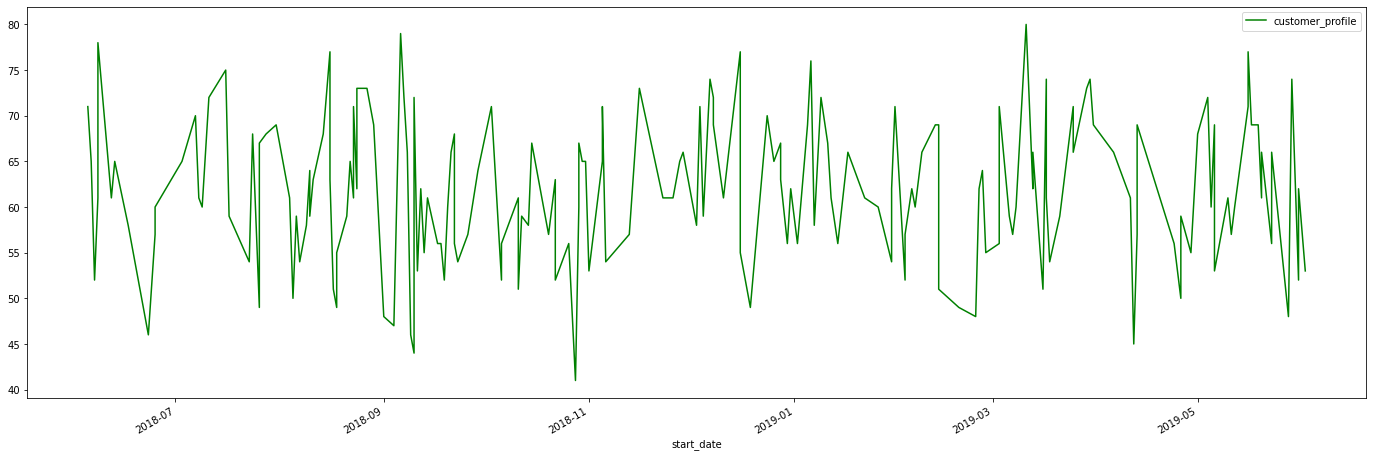

In [35]:
plt.rcParams["figure.figsize"] = (24,8)
ax = pl.plot.line(y='customer_profile',c='green')
plt.show()

### Quantity of each Happiness Rating

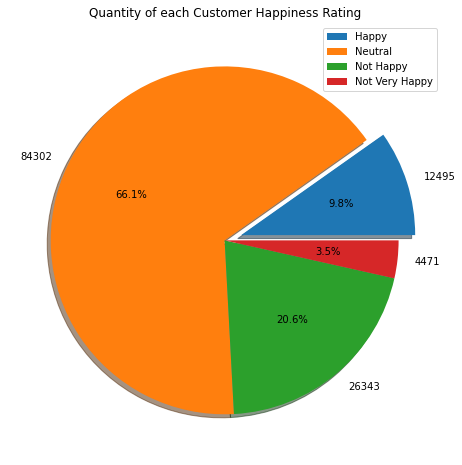

In [36]:
pie_vals = cp['customer_profile'].groupby(cp['customer_happiness_index']).sum()

plt.rcParams["figure.figsize"] = (8,8)
plt.pie(pie_vals, labels=pie_vals, explode=(0.1, 0, 0, 0), autopct='%1.1f%%', shadow=True)
plt.title('Quantity of each Customer Happiness Rating')
plt.legend(pie_vals.index)
plt.show()

# Prediction based on User Inputs

for _ in range(5):
    user_profile = input('Enter User Profile Score: ')
    load_profile = input('Enter Load Profile Score: ')
    subscription_profile = input('Enter User Profile Score: ')
    customer_experience_profile = input('Enter Customer Experience Profile')
    customer_support_engagement_profile = input('Enter Customer Support Engagement Profile')
    in_preds = pd.DataFrame(data = [[user_profile, load_profile, subscription_profile,customer_experience_profile, customer_support_engagement_profile ]],
                           columns = ['user_profile', 'load_profile', 'subscription_profile', 'customer_experience_profile', 'customer_support_engagement_profile'])
    break
    
predict_logreg = logreg.predict(in_preds)

md("Prediction: {}".format(predict_logreg))

# PyCaret for Machine Learning

In [37]:
import pycaret
from pycaret.classification import setup
from pycaret.classification import compare_models

In [38]:
# Using Train Set
mc_data = x_train.copy()
mc_data['customer_happiness_index'] = y_train.copy()
mc_data.head()

,user_profile,load_profile,subscription_profile,customer_experience_profile,customer_support_engagement_profile,customer_happiness_index
582,86,43,87,50,53,Neutral
159,83,73,90,66,30,Neutral
1827,70,60,45,60,43,Not Happy
318,80,66,85,60,53,Neutral
708,70,60,47,40,56,Not Happy


In [39]:
grid = setup(data=mc_data, target=mc_data.columns[-1], html=False, silent=True, verbose=False)
best = compare_models()
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9964,0.9999,0.9927,0.9965,0.9964,0.9932,0.9932,3.286


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9964,0.9999,0.9927,0.9965,0.9964,0.9932,0.9932,3.286
knn,K Neighbors Classifier,0.9053,0.9786,0.7916,0.9064,0.9018,0.8135,0.8169,0.034


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9964,0.9999,0.9927,0.9965,0.9964,0.9932,0.9932,3.286
knn,K Neighbors Classifier,0.9053,0.9786,0.7916,0.9064,0.9018,0.8135,0.8169,0.034
nb,Naive Bayes,0.8301,0.9256,0.6824,0.8394,0.8221,0.6596,0.6641,0.017


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9964,0.9999,0.9927,0.9965,0.9964,0.9932,0.9932,3.286
knn,K Neighbors Classifier,0.9053,0.9786,0.7916,0.9064,0.9018,0.8135,0.8169,0.034
dt,Decision Tree Classifier,0.8391,0.8535,0.7538,0.8433,0.8397,0.6971,0.6988,0.012
nb,Naive Bayes,0.8301,0.9256,0.6824,0.8394,0.8221,0.6596,0.6641,0.017


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9964,0.9999,0.9927,0.9965,0.9964,0.9932,0.9932,3.286
knn,K Neighbors Classifier,0.9053,0.9786,0.7916,0.9064,0.9018,0.8135,0.8169,0.034
dt,Decision Tree Classifier,0.8391,0.8535,0.7538,0.8433,0.8397,0.6971,0.6988,0.012
nb,Naive Bayes,0.8301,0.9256,0.6824,0.8394,0.8221,0.6596,0.6641,0.017
svm,SVM - Linear Kernel,0.6149,0.0000,0.3707,0.5235,0.5480,0.2041,0.2378,0.024


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9964,0.9999,0.9927,0.9965,0.9964,0.9932,0.9932,3.286
knn,K Neighbors Classifier,0.9053,0.9786,0.7916,0.9064,0.9018,0.8135,0.8169,0.034
dt,Decision Tree Classifier,0.8391,0.8535,0.7538,0.8433,0.8397,0.6971,0.6988,0.012
nb,Naive Bayes,0.8301,0.9256,0.6824,0.8394,0.8221,0.6596,0.6641,0.017
ridge,Ridge Classifier,0.7954,0.0000,0.4235,0.6920,0.7374,0.5449,0.5764,0.020
svm,SVM - Linear Kernel,0.6149,0.0000,0.3707,0.5235,0.5480,0.2041,0.2378,0.024


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9964,0.9999,0.9927,0.9965,0.9964,0.9932,0.9932,3.286
rf,Random Forest Classifier,0.9088,0.9804,0.7861,0.9108,0.9036,0.8179,0.8223,0.187
knn,K Neighbors Classifier,0.9053,0.9786,0.7916,0.9064,0.9018,0.8135,0.8169,0.034
dt,Decision Tree Classifier,0.8391,0.8535,0.7538,0.8433,0.8397,0.6971,0.6988,0.012
nb,Naive Bayes,0.8301,0.9256,0.6824,0.8394,0.8221,0.6596,0.6641,0.017
ridge,Ridge Classifier,0.7954,0.0000,0.4235,0.6920,0.7374,0.5449,0.5764,0.020
svm,SVM - Linear Kernel,0.6149,0.0000,0.3707,0.5235,0.5480,0.2041,0.2378,0.024


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9964,0.9999,0.9927,0.9965,0.9964,0.9932,0.9932,3.286
qda,Quadratic Discriminant Analysis,0.9634,0.9954,0.9493,0.9643,0.9633,0.9303,0.9307,0.023
rf,Random Forest Classifier,0.9088,0.9804,0.7861,0.9108,0.9036,0.8179,0.8223,0.187
knn,K Neighbors Classifier,0.9053,0.9786,0.7916,0.9064,0.9018,0.8135,0.8169,0.034
dt,Decision Tree Classifier,0.8391,0.8535,0.7538,0.8433,0.8397,0.6971,0.6988,0.012
nb,Naive Bayes,0.8301,0.9256,0.6824,0.8394,0.8221,0.6596,0.6641,0.017
ridge,Ridge Classifier,0.7954,0.0000,0.4235,0.6920,0.7374,0.5449,0.5764,0.020
svm,SVM - Linear Kernel,0.6149,0.0000,0.3707,0.5235,0.5480,0.2041,0.2378,0.024


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9964,0.9999,0.9927,0.9965,0.9964,0.9932,0.9932,3.286
qda,Quadratic Discriminant Analysis,0.9634,0.9954,0.9493,0.9643,0.9633,0.9303,0.9307,0.023
rf,Random Forest Classifier,0.9088,0.9804,0.7861,0.9108,0.9036,0.8179,0.8223,0.187
knn,K Neighbors Classifier,0.9053,0.9786,0.7916,0.9064,0.9018,0.8135,0.8169,0.034
dt,Decision Tree Classifier,0.8391,0.8535,0.7538,0.8433,0.8397,0.6971,0.6988,0.012
nb,Naive Bayes,0.8301,0.9256,0.6824,0.8394,0.8221,0.6596,0.6641,0.017
ridge,Ridge Classifier,0.7954,0.0000,0.4235,0.6920,0.7374,0.5449,0.5764,0.020
ada,Ada Boost Classifier,0.6774,0.5545,0.4714,0.6205,0.6422,0.3367,0.3464,0.070
svm,SVM - Linear Kernel,0.6149,0.0000,0.3707,0.5235,0.5480,0.2041,0.2378,0.024


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9964,0.9999,0.9927,0.9965,0.9964,0.9932,0.9932,3.286
qda,Quadratic Discriminant Analysis,0.9634,0.9954,0.9493,0.9643,0.9633,0.9303,0.9307,0.023
rf,Random Forest Classifier,0.9088,0.9804,0.7861,0.9108,0.9036,0.8179,0.8223,0.187
knn,K Neighbors Classifier,0.9053,0.9786,0.7916,0.9064,0.9018,0.8135,0.8169,0.034
gbc,Gradient Boosting Classifier,0.8981,0.9756,0.7836,0.8974,0.8936,0.7990,0.8022,0.235
dt,Decision Tree Classifier,0.8391,0.8535,0.7538,0.8433,0.8397,0.6971,0.6988,0.012
nb,Naive Bayes,0.8301,0.9256,0.6824,0.8394,0.8221,0.6596,0.6641,0.017
ridge,Ridge Classifier,0.7954,0.0000,0.4235,0.6920,0.7374,0.5449,0.5764,0.020
ada,Ada Boost Classifier,0.6774,0.5545,0.4714,0.6205,0.6422,0.3367,0.3464,0.070
svm,SVM - Linear Kernel,0.6149,0.0000,0.3707,0.5235,0.5480,0.2041,0.2378,0.024


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9964,0.9999,0.9927,0.9965,0.9964,0.9932,0.9932,3.286
qda,Quadratic Discriminant Analysis,0.9634,0.9954,0.9493,0.9643,0.9633,0.9303,0.9307,0.023
lda,Linear Discriminant Analysis,0.9526,0.9969,0.9201,0.9564,0.9523,0.9110,0.9123,0.012
rf,Random Forest Classifier,0.9088,0.9804,0.7861,0.9108,0.9036,0.8179,0.8223,0.187
knn,K Neighbors Classifier,0.9053,0.9786,0.7916,0.9064,0.9018,0.8135,0.8169,0.034
gbc,Gradient Boosting Classifier,0.8981,0.9756,0.7836,0.8974,0.8936,0.7990,0.8022,0.235
dt,Decision Tree Classifier,0.8391,0.8535,0.7538,0.8433,0.8397,0.6971,0.6988,0.012
nb,Naive Bayes,0.8301,0.9256,0.6824,0.8394,0.8221,0.6596,0.6641,0.017
ridge,Ridge Classifier,0.7954,0.0000,0.4235,0.6920,0.7374,0.5449,0.5764,0.020
ada,Ada Boost Classifier,0.6774,0.5545,0.4714,0.6205,0.6422,0.3367,0.3464,0.070


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9964,0.9999,0.9927,0.9965,0.9964,0.9932,0.9932,3.286
qda,Quadratic Discriminant Analysis,0.9634,0.9954,0.9493,0.9643,0.9633,0.9303,0.9307,0.023
lda,Linear Discriminant Analysis,0.9526,0.9969,0.9201,0.9564,0.9523,0.9110,0.9123,0.012
rf,Random Forest Classifier,0.9088,0.9804,0.7861,0.9108,0.9036,0.8179,0.8223,0.187
knn,K Neighbors Classifier,0.9053,0.9786,0.7916,0.9064,0.9018,0.8135,0.8169,0.034
et,Extra Trees Classifier,0.9052,0.9829,0.7725,0.9085,0.8991,0.8098,0.8154,0.171
gbc,Gradient Boosting Classifier,0.8981,0.9756,0.7836,0.8974,0.8936,0.7990,0.8022,0.235
dt,Decision Tree Classifier,0.8391,0.8535,0.7538,0.8433,0.8397,0.6971,0.6988,0.012
nb,Naive Bayes,0.8301,0.9256,0.6824,0.8394,0.8221,0.6596,0.6641,0.017
ridge,Ridge Classifier,0.7954,0.0000,0.4235,0.6920,0.7374,0.5449,0.5764,0.020


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9964,0.9999,0.9927,0.9965,0.9964,0.9932,0.9932,3.286
qda,Quadratic Discriminant Analysis,0.9634,0.9954,0.9493,0.9643,0.9633,0.9303,0.9307,0.023
lda,Linear Discriminant Analysis,0.9526,0.9969,0.9201,0.9564,0.9523,0.9110,0.9123,0.012
xgboost,Extreme Gradient Boosting,0.9106,0.9837,0.8286,0.9130,0.9082,0.8256,0.8278,0.676
rf,Random Forest Classifier,0.9088,0.9804,0.7861,0.9108,0.9036,0.8179,0.8223,0.187
knn,K Neighbors Classifier,0.9053,0.9786,0.7916,0.9064,0.9018,0.8135,0.8169,0.034
et,Extra Trees Classifier,0.9052,0.9829,0.7725,0.9085,0.8991,0.8098,0.8154,0.171
gbc,Gradient Boosting Classifier,0.8981,0.9756,0.7836,0.8974,0.8936,0.7990,0.8022,0.235
dt,Decision Tree Classifier,0.8391,0.8535,0.7538,0.8433,0.8397,0.6971,0.6988,0.012
nb,Naive Bayes,0.8301,0.9256,0.6824,0.8394,0.8221,0.6596,0.6641,0.017


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9964,0.9999,0.9927,0.9965,0.9964,0.9932,0.9932,3.286
qda,Quadratic Discriminant Analysis,0.9634,0.9954,0.9493,0.9643,0.9633,0.9303,0.9307,0.023
lda,Linear Discriminant Analysis,0.9526,0.9969,0.9201,0.9564,0.9523,0.9110,0.9123,0.012
lightgbm,Light Gradient Boosting Machine,0.9178,0.9836,0.8297,0.9195,0.9149,0.8392,0.8414,1.167
xgboost,Extreme Gradient Boosting,0.9106,0.9837,0.8286,0.9130,0.9082,0.8256,0.8278,0.676
rf,Random Forest Classifier,0.9088,0.9804,0.7861,0.9108,0.9036,0.8179,0.8223,0.187
knn,K Neighbors Classifier,0.9053,0.9786,0.7916,0.9064,0.9018,0.8135,0.8169,0.034
et,Extra Trees Classifier,0.9052,0.9829,0.7725,0.9085,0.8991,0.8098,0.8154,0.171
gbc,Gradient Boosting Classifier,0.8981,0.9756,0.7836,0.8974,0.8936,0.7990,0.8022,0.235
dt,Decision Tree Classifier,0.8391,0.8535,0.7538,0.8433,0.8397,0.6971,0.6988,0.012


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9964,0.9999,0.9927,0.9965,0.9964,0.9932,0.9932,3.286
qda,Quadratic Discriminant Analysis,0.9634,0.9954,0.9493,0.9643,0.9633,0.9303,0.9307,0.023
lda,Linear Discriminant Analysis,0.9526,0.9969,0.9201,0.9564,0.9523,0.9110,0.9123,0.012
catboost,CatBoost Classifier,0.9392,0.9930,0.8669,0.9396,0.9377,0.8821,0.8832,1.368
lightgbm,Light Gradient Boosting Machine,0.9178,0.9836,0.8297,0.9195,0.9149,0.8392,0.8414,1.167
xgboost,Extreme Gradient Boosting,0.9106,0.9837,0.8286,0.9130,0.9082,0.8256,0.8278,0.676
rf,Random Forest Classifier,0.9088,0.9804,0.7861,0.9108,0.9036,0.8179,0.8223,0.187
knn,K Neighbors Classifier,0.9053,0.9786,0.7916,0.9064,0.9018,0.8135,0.8169,0.034
et,Extra Trees Classifier,0.9052,0.9829,0.7725,0.9085,0.8991,0.8098,0.8154,0.171
gbc,Gradient Boosting Classifier,0.8981,0.9756,0.7836,0.8974,0.8936,0.7990,0.8022,0.235


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9964,0.9999,0.9927,0.9965,0.9964,0.9932,0.9932,3.286
qda,Quadratic Discriminant Analysis,0.9634,0.9954,0.9493,0.9643,0.9633,0.9303,0.9307,0.023
lda,Linear Discriminant Analysis,0.9526,0.9969,0.9201,0.9564,0.9523,0.9110,0.9123,0.012
catboost,CatBoost Classifier,0.9392,0.9930,0.8669,0.9396,0.9377,0.8821,0.8832,1.368
lightgbm,Light Gradient Boosting Machine,0.9178,0.9836,0.8297,0.9195,0.9149,0.8392,0.8414,1.167
xgboost,Extreme Gradient Boosting,0.9106,0.9837,0.8286,0.9130,0.9082,0.8256,0.8278,0.676
rf,Random Forest Classifier,0.9088,0.9804,0.7861,0.9108,0.9036,0.8179,0.8223,0.187
knn,K Neighbors Classifier,0.9053,0.9786,0.7916,0.9064,0.9018,0.8135,0.8169,0.034
et,Extra Trees Classifier,0.9052,0.9829,0.7725,0.9085,0.8991,0.8098,0.8154,0.171
gbc,Gradient Boosting Classifier,0.8981,0.9756,0.7836,0.8974,0.8936,0.7990,0.8022,0.235


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=8032, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### Tuning Decision Tree Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier
from pycaret.classification import tune_model

In [41]:
hyperparameter_tuning = tune_model(DecisionTreeClassifier(random_state=0), n_iter=1000, choose_better=True)
print(hyperparameter_tuning)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 6160 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 10000 out of 10000 | elapsed:   24.7s finished


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8125,0.8855,0.6353,0.8134,0.8102,0.6422,0.6434
1,0.8214,0.8576,0.7011,0.8247,0.8144,0.6426,0.6498
2,0.9018,0.9505,0.8605,0.9133,0.9051,0.8186,0.8208
3,0.8393,0.9046,0.8116,0.8490,0.8424,0.7055,0.7079
4,0.8482,0.9034,0.7911,0.8593,0.8494,0.7214,0.7263
5,0.8839,0.9645,0.8498,0.9048,0.8865,0.7927,0.7988
6,0.8393,0.8745,0.6529,0.8313,0.8328,0.6898,0.6910
7,0.8571,0.8948,0.8055,0.8570,0.8554,0.7239,0.7257
8,0.8571,0.8802,0.7060,0.8543,0.8516,0.7264,0.7281
9,0.8198,0.8655,0.7272,0.8143,0.8149,0.6449,0.6477


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=16, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


## Implementing New Hyper-Parameters

### Without HP Tuning and using Default values of DTClassifier

In [42]:
# without hp tuning
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [43]:
dt.score(x_test, y_test)

0.84

### Using HP Tuning

In [44]:
dt = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [45]:
dt.score(x_test,y_test)

0.8525